## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')
# Display the data table for preview
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
len(mouse_df['Mouse ID'])

1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_df[mouse_df[['Mouse ID', 'Timepoint']].duplicated() == True]



In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cl_df = mouse_df[mouse_df[['Mouse ID', 'Timepoint']].duplicated() == False]


In [7]:
# Checking the number of mice in the clean DataFrame.
len(cl_df)

1888

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
v_mean = mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
v_var = mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
v_std = mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
v_median = mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
v_sem = mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
sum_vol = pd.DataFrame({'Mean': v_mean, 'Median': v_median ,'Variance': v_var, 'Standard Deviation': v_std, 'SEM': v_sem})
sum_vol


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
tumor_volume_regimen = mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_volume_regimen

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:title={'center':'Total measurements per Drug Regimen'}, xlabel='Drug Regimen'>

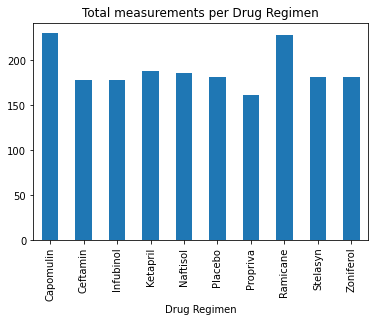

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen_totals = mouse_df.groupby('Drug Regimen')['Drug Regimen'].count()
regimen_totals.plot(kind='bar', title="Total measurements per Drug Regimen")


<BarContainer object of 10 artists>

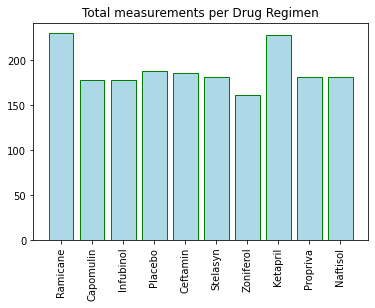

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.figure()
y_axis = list(regimen_totals)
x_axis = list(mouse_df['Drug Regimen'].unique())
plt.xticks(rotation='vertical')
plt.title('Total measurements per Drug Regimen')
plt.bar(x_axis, y_axis, color = 'lightblue', edgecolor = 'green')


<AxesSubplot:ylabel='Mouse ID'>

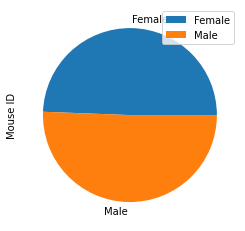

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
by_sex = mouse_df[['Mouse ID', 'Sex']].groupby('Sex').count()
by_sex.plot.pie(y='Mouse ID')


Text(0.5, 1.0, 'Mouse distribution by sex')

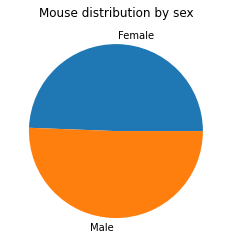

In [59]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
by_sex = mouse_df[['Mouse ID', 'Sex']].groupby('Sex').count()
plt.figure()
labels = ['Female','Male']
plt.pie(by_sex['Mouse ID'], labels=labels)
plt.title('Mouse distribution by sex')

## Quartiles, Outliers and Boxplots

In [85]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_point = mouse_df.groupby('Mouse ID')['Timepoint'].max()
last_point = pd.DataFrame(last_point)
last_point.reset_index()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_point_df = pd.merge(last_point, mouse_df, on=['Mouse ID', 'Timepoint'])
last_point_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [183]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ('Capomulin Ramicane Infubinol Ceftamin').split()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_capo = []
tumor_vol_rami = []
tumor_vol_infu = []
tumor_vol_ceft = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
vol = last_point_df['Tumor Volume (mm3)']
quartiles = vol.quantile([.25, .5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of volumes is {round(lowerq,2)}")
print(f"The upper quartile of volumes is {round(upperq,2)}")
    # Locate the rows which contain mice on each drug and get the tumor volumes
for i in range(0,len(last_point_df)):
    if last_point_df.iloc[i, 2] == 'Capomulin':
        tumor_vol_capo.append(last_point_df.iloc[i, 6])
    elif last_point_df.iloc[i, 2] == 'Ramicane':
        tumor_vol_rami.append(last_point_df.iloc[i, 6])
    elif last_point_df.iloc[i, 2] == 'Infubinol':
        tumor_vol_infu.append(last_point_df.iloc[i, 6])
    elif last_point_df.iloc[i, 2] == 'Ceftamin':
        tumor_vol_ceft.append(last_point_df.iloc[i, 6])
            
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
lower_bound = round(lowerq - (1.5 * iqr),2)
upper_bound = round(upperq + (1.5 * iqr),2)
print(f"Values below {lower_bound}mm3 could be outliers.")
print(f"Values above {upper_bound}mm3 could be outliers.")


The lower quartile of volumes is 45.93
The upper quartile of volumes is 64.96
Values below 17.4mm3 could be outliers.
Values above 93.49mm3 could be outliers.


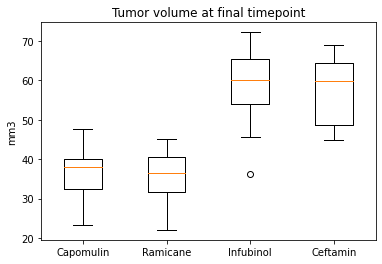

In [205]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxes = [tumor_vol_capo, tumor_vol_rami, tumor_vol_infu, tumor_vol_ceft]
labels = drugs
fig1, ax = plt.subplots()
ax.boxplot(boxes, labels=labels)
plt.title('Tumor volume at final timepoint')
plt.ylabel('mm3')
plt.show()

## Line and Scatter Plots

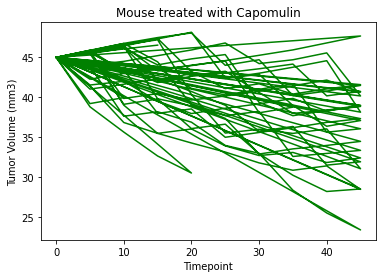

In [146]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_mouse = mouse_df[mouse_df['Drug Regimen'] == 'Capomulin']
plt.plot(capo_mouse['Timepoint'], capo_mouse['Tumor Volume (mm3)'], color='green')
plt.title('Mouse treated with Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

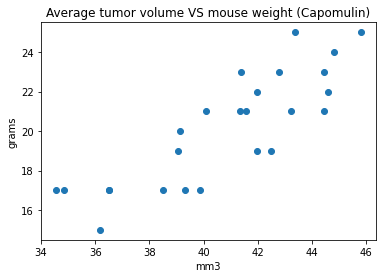

In [145]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_vol = capo_mouse.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
avg_weight = capo_mouse.groupby('Mouse ID')['Weight (g)'].mean()
plt.scatter(avg_vol, avg_weight)
plt.title('Average tumor volume VS mouse weight (Capomulin)')
plt.xlabel('mm3')
plt.ylabel('grams')
plt.show()

## Correlation and Regression

In [157]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr = st.pearsonr(avg_vol, avg_weight)
print(f"The correlation coefficient between the average tumor volume") 
print(f"and weight for mouses treated with Capomulin is: {round(corr[0],2)}")

The correlation coefficient between the average tumor volume
and weight for mouses treated with Capomulin is: 0.84


In [158]:
from scipy.stats import linregress

In [159]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_vol, avg_weight)

In [161]:
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

'y = 0.74x + -10.15'

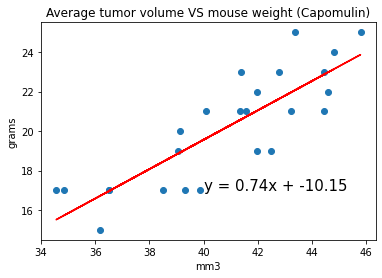

In [170]:
regression_values = avg_vol * slope + intercept
plt.plot(avg_vol, regression_values, "r-")
plt.scatter(avg_vol, avg_weight)
plt.title('Average tumor volume VS mouse weight (Capomulin)')
plt.xlabel('mm3')
plt.ylabel('grams')
plt.annotate(line_eq,(40,17), size=15)
plt.show()